<div align="center">
    <img src="images/logo_fmkn.png" alt="logo_fmkn" />
</div>

# Машинное обучение

### Лекция 5. Оценивание качества классификации. Обобщающая способность. Методы отбора признаков.

<br />
<br />
1 октября 2021

### Пятиминутка

1. Нарисуйте единичные окружности в $L_p$ для нескольких значений $p$
2. Что можно обучать в метрических классификаторах?
3. Как можно решить проблему выбросов в данных?

|<img src="images/Sir_William_Thomson_Baron_Kelvin.jpg" width=250>|«If you can't measure it, you can't improve it»|
|:-:|:-|
|William Thomson, 1st Baron Kelvin| |

### Способы оценки качества алгоритма

 * Оценка при использовании — оценка «чёрного ящика». АВ-тестирование
   - делим кейсы использования на две эквивалентные выборки: A и B
   - на выборке A применяем алгоритм a, на выборке B применяем алгоритм b
   - сравниваем качество
 * Оценка при обучении — оценка «прозрачного ящика»


### Анализ ошибок классификации


**Вспомним задачу**:

$X$ — объекты, $Y$ — ответы

$X^\ell = (x_i, y_i)_{i=1}^\ell$ — обучающая выборка, ${y_i \in \{-1, +1\}}$

Алгоритм классификации $a(x_i) \in \{-1, +1\}$

<div align="center">
  <table>
    <tr>
      <td></td>
      <td>ответ классификатора</td>
      <td>правильный ответ</td>
    </tr>
    <tr>
      <td>TP, True Positive</td>
      <td>$a(x_i) = +1$</td>
      <td>$y_i = +1$</td>
    </tr>
    <tr>
      <td>TN, True Negative</td>
      <td>$a(x_i) = -1$</td>
      <td>$y_i = -1$</td>
    </tr>
    <tr>
      <td>FP, False Positive</td>
      <td>$a(x_i) = +1$</td>
      <td>$y_i = -1$</td>
    </tr>
    <tr>
      <td>FN, False Negative</td>
      <td>$a(x_i) = -1$</td>
      <td>$y_i = +1$</td>
    </tr>
  </table>        
</div>


### Accuracy

Доля правильных ответов (чем больше, тем лучше):

Accuracy = $\frac{1}{\ell} \sum\limits_{i=1}^\ell [a(x_i)=y_i] = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}$

**Преимущества**:
 *  соответствует интуитивным представлениям о качестве классификации

**Недостатки**:
 * не учитывается возможная несбалансированность выборки
 * неважна цена ошибки на объектах разных классов

Например, если в выборке из 1000 человек 950 здоровых и 50 больных, то легко получить Accuracy = 0.95 константой.

### Precision, Recall

Precision (Точность) $= \frac{\text{TP}}{\text{TP + FP}}$ —
доля правильных среди найденных

Recall (Полнота) $= \frac{\text{TP}}{\text{TP + FN}}$ —
доля найденных среди правильных

Характеризуют разные стороны качества классификатора:
 * Чем выше точность, тем меньше ложных срабатываний
 * Чем выше полнота, тем меньше ложных пропусков
 * Приоритет в сторону точности или полноты выбирается в зависимости от задачи


### Точность и полнота. Примеры

 * Тестирование на Covid-19 (опасный вирус):
   - Важнее полнота — лучше лишний раз поднять тревогу, чем пропустить
   
<div align="center">
   <img src="images/Coronavirus-CDC-1600x900-1.jpg" width=400>
</div>
   

 * Боевая система автонаведения:
   - Важнее точность — по своим стрелять не хочется
<div align="center">
   <img src="images/EagleEye.jpg" width=700>
</div>


### Поиск единой метрики качества

Арифметическое среднее:

$A = \frac{\text{precision} + \text{recall}}{2} $


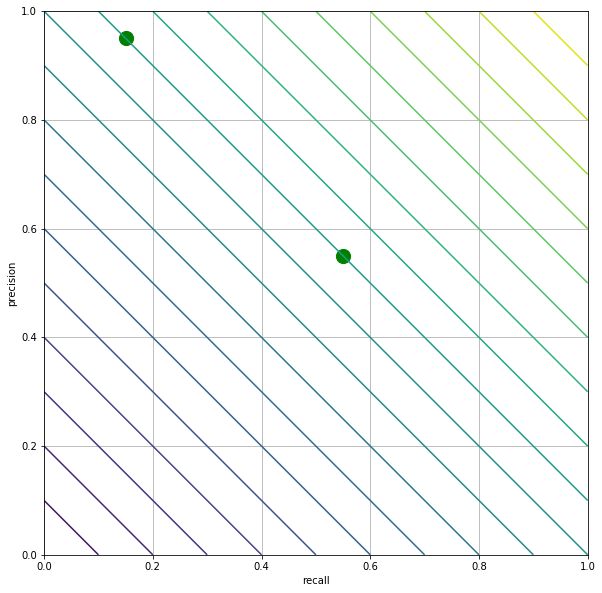

In [33]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('recall')
ax.set_ylabel('precision')

x = np.linspace(0, 1, num=100)
y = np.linspace(0, 1, num=100)
recall, precision = np.meshgrid(x, y)

z = (precision + recall) / 2

h = plt.contour(x, y, z, levels = 20)
plt.axis('scaled')
x_points = np.array([0.55, 0.15])
plt.scatter(x_points, 1.1 - x_points, s=200, c="g")

ax.grid(True)

fig.set_size_inches(10, 10)
plt.show()

Минимум:

$M = \min(\text{precision}, \text{recall}) $


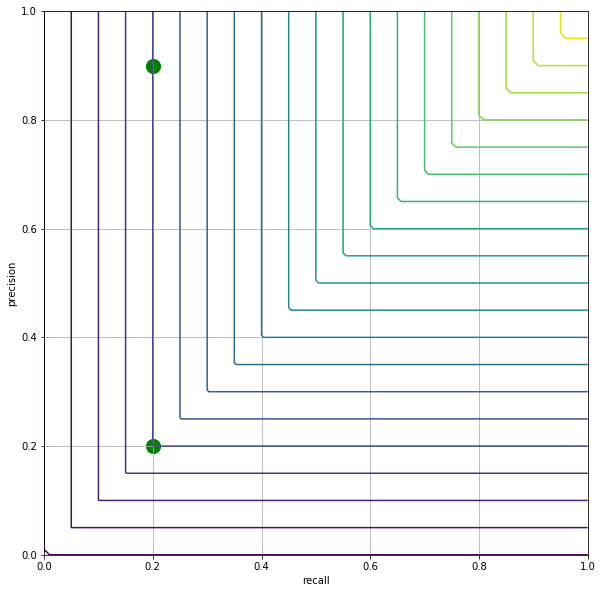

In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('recall')
ax.set_ylabel('precision')

x = np.linspace(0, 1, num=100)
y = np.linspace(0, 1, num=100)
recall, precision = np.meshgrid(x, y)

z = np.minimum(precision, recall)

h = plt.contour(x, y, z, levels = 20)
plt.axis('scaled')
x_points = np.array([0.2, 0.2])
plt.scatter(x_points, np.array([0.2, 0.9]), s=200, c="g")

ax.grid(True)

fig.set_size_inches(10, 10)
plt.show()

F-мера:

$F = \frac{2 * \text{precision} * \text{recall}}{\text{precision} + \text{recall}} = \frac{2}{1/\text{precision} + 1/\text{recall}}$


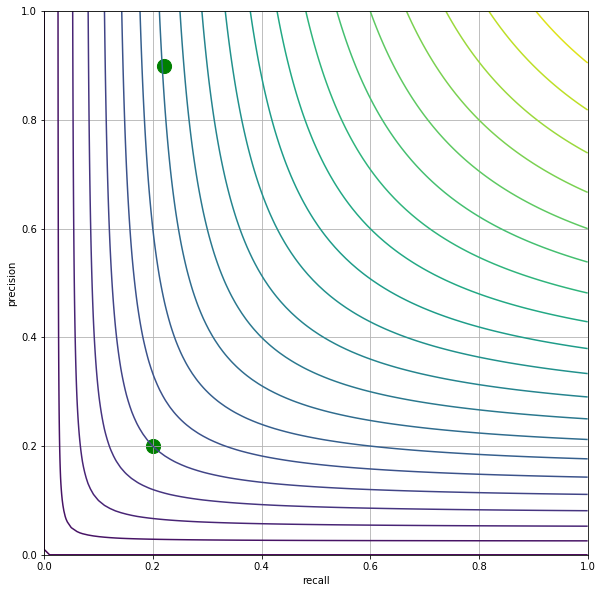

In [37]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('recall')
ax.set_ylabel('precision')

x = np.linspace(0, 1, num=100)
y = np.linspace(0, 1, num=100)
recall, precision = np.meshgrid(x, y)

z = (2 * precision * recall) / (precision + recall + 1e-5) 

h = plt.contour(x, y, z, levels = 20)
plt.axis('scaled')
x_points = np.array([0.2, 0.22])
plt.scatter(x_points, np.array([0.2, 0.9]), s=200, c="g")

ax.grid(True)

fig.set_size_inches(10, 10)
plt.show()

$F_\beta$-мера:

$F_\beta = \frac{(1 + \beta^2)PR}{\beta^2P + R}$


<div class="alert alert-info">
<b>Вопрос 1:</b> За что отвечает коэффициент $\beta$?
</div>

### Случай алгоритма, возвращающего вероятность

Пусть $b(x_i) = P(y_i == 1)$

наш старый алгоритм $a(x)$ можно получить из $b(x) \text{ и } th \in [0, 1]$ следующим образом:

$a(x) = [b(x) > th]$

Интересно оценивать качество алгоритма независимо от влияния порога.


### PR-кривая

 * Отсортируем объекты по возрастанию оценки $b(x)$:

$b(x_{(1)}) \leq \dots \leq b(x_{(\ell)})$

 * Переберем все пороги классификации, начав с максимального:

$t_\ell = b(x_{(\ell)})$

$\dots$

$t_1 = b(x_{(1)})$

$t_0 = b(x_{(1)}) - \varepsilon$

 * Для каждого порога посчитаем точность и полноту

 * Нанесем соответствующую точку в осях «полнота - точность»
  
 * Соединим точки, получив Precision-Recall-кривую


### Пример

<div align="center">
  <table>
    <tr>
      <td>$b(x)$</td>
      <td>0.14</td>
      <td>0.23</td>
      <td>0.39</td>
      <td>0.52</td>
      <td>0.73</td>
      <td>0.90</td>
    </tr>
    <tr>
      <td>$y$</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
    </tr>
  </table>        
</div>

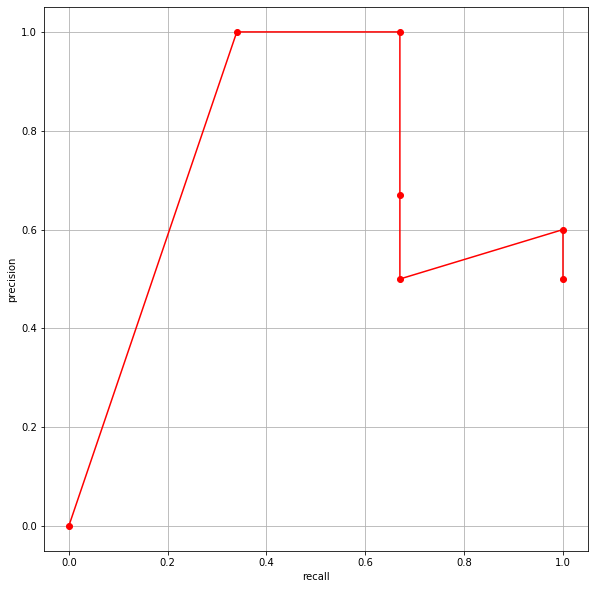

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('recall')
ax.set_ylabel('precision')

recall_points = np.array([0.0, 0.34, 0.67, 0.67, 0.67, 1.0, 1.0])
precision_points = np.array([0.0, 1.0, 1.0, 0.67, 0.5, 0.6, 0.5])

ax.plot(recall_points, precision_points, 'ro-')

plt.axis('scaled')

ax.grid(True)

fig.set_size_inches(10, 10)
plt.show()

<div class="alert alert-info">
<b>Вопрос 2:</b> Почему такие значения и график?
</div>

### Свойства PR-кривой

 * Левая точка: всегда (0, 0) — (все объекты относим к классу 0)
 * Правая точка: (1, $\ell_+/\ell)$, $\ell_+$ — число объектов класса 1 в выборке
 * Если выборка идеально разделима, то кривая пройдет через точку (1, 1)
 * Чем больше площадь под кривой, тем лучше
 * Хорошо подходит для измерения качества при сильном дисбалансе классов

### ROC-кривая

ROC – «reciever operating characteristic», «рабочая характеристика приёмника»

 * <span style="color:red">по оси X: False Positive Rate, доля ошибочных положительных классификаций</span>
 
 $\text{FPR} = \frac{\text{FP}}{\text{FP+TN}} = 
 \frac{\sum\limits_{i=1}^l [y_i = -1] [a(x_i) = +1]}{\sum\limits_{i=1}^l [y_i = -1]}
 $

 1 - FPR называется _специфичностью_ алгоритма
 
 * <span style="color:red">по оси Y: True Positive Rate, доля правильных положительных классификаций</span>

 $\text{TPR} = \frac{\text{TP}}{\text{TP+FN}} = 
  \frac{\sum\limits_{i=1}^l [y_i = +1] [a(x_i) = +1]}{\sum\limits_{i=1}^l [y_i = +1]}
 $

 TPR называется чувствительностью алгоритма (== Recall)


### ROC-кривая. Схема построения

 * Отсортируем объекты по возрастанию оценки $b(x)$
 
 $b(x_{(1)}) \leq \dots \leq b(x_{(\ell)})$
 
 * Переберем все пороги классификации, начав с максимального
 
$t_\ell = b(x_{(\ell)})$

$\dots$

$t_1 = b(x_{(1)})$

$t_0 = b(x_{(1)}) - \varepsilon$

 * Для каждого порога посчитаем TPR и FPR
 * Нанесем соответствующую точку в осях «TPR - FPR»
 * Соединим точки, получив ROC-кривую


### Пример (числа те же)

<div align="center">
  <table>
    <tr>
      <td>$b(x)$</td>
      <td>0.14</td>
      <td>0.23</td>
      <td>0.39</td>
      <td>0.52</td>
      <td>0.73</td>
      <td>0.90</td>
    </tr>
    <tr>
      <td>$y$</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
    </tr>
  </table>        
</div>

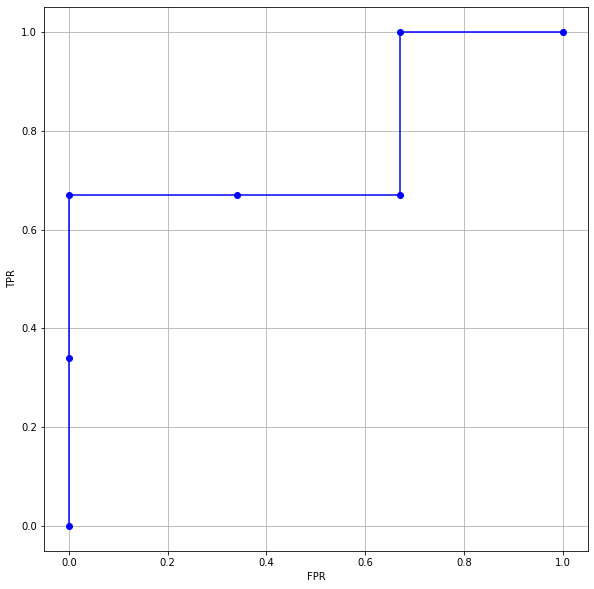

In [42]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

FPR_points = np.array([0.0, 0.0, 0.0, 0.34, 0.67, 0.67, 1.0])
TPR_points = np.array([0.0, 0.34, 0.67, 0.67, 0.67, 1.0, 1.0])

ax.plot(FPR_points, TPR_points, 'bo-')

plt.axis('scaled')

ax.grid(True)

fig.set_size_inches(10, 10)
plt.show()

### Свойства ROC-кривой

 * Левая точка: всегда (0, 0) (все объекты относим к классу 0)
 * Правая точка: (1, 1) (все объекты относим к классу 1)
 * Если выборка идеально разделима, то кривая пройдет через точку (0, 1)
 * Чем больше площадь под кривой (AUC, Area Under the Curve), тем лучше
 * Интерпретация: AUC-ROC равна вероятности того, что случайно взятый объект класса 1 получит оценку выше, чем случайно взятый объект класса 0
 * Имеем проблемы при сильном дисбалансе классов

### Алгоритм эффективного построения ROC-кривой

**Вход**: выборка $X^\ell$, дискриминантная функция $b(x)$

**Выход**: $\{(FPR_i, TPR_i)\}_{i=0}^\ell$, AUC — площадь под ROC-кривой

$\ell_y := \sum\limits_{i=1}^\ell [y_i = y]$ для всех $y \in Y$

упорядочить выборку $X^\ell$ по убыванию значений $b(x_i)$ 

поставить первую точку в начало координат:

$(\text{FPR}_0, \text{TPR}_0) := (0, 0); \text{AUC} := 0$

**для** $i := 1, \dots, \ell $

 $\ \ \ $ **если** $y_i = -1$ **то**
 
 $\ \ \ \text{FPR}_i := \text{FPR}_{i-1} + \frac{1}{\ell_-}; \text{TPR}_i := \text{TPR}_{i-1}$
 
 $\ \ \ \text{AUC} := \text{AUC} + \frac{1}{\ell_-} \text{TPR}_i$

**иначе**

 $\ \ \ $ $\text{FPR}_i := \text{FPR}_{i-1}; \text{TPR}_i := \text{TPR}_{i-1} + \frac{1}{\ell_+}$


### Градиентная максимизация AUC

$b(x)= g(x_i, w) - w_0$

Модель: $a(x_i, w, w_0) = \text{sign}(g(x_i, w) - w_0) $

$\text{AUC}$ – это доля правильно упорядоченных пар $(x_i, x_j)$:

$\text{AUC}(w) = \frac{1}{\ell_-} \sum\limits_{i=1}^\ell [y_i = -1] \text{TPR}_i = \\
 = \frac{1}{\ell_-\ell_+} \sum\limits_{i=1}^\ell \sum\limits_{j=1}^\ell [y_i < y_j] [g(x_i, w) < g(x_j, w)] \to \max\limits_w
$

Явная максимизация аппроксимированного $\text{AUC}$:

$1 - \text{AUC}(w) \leq Q(w) = \sum\limits_{i,j: y_i < y_j} \mathcal{L}\underbrace{(g(x_j, w) - g(x_i, w))}_{M_{ij}(w)} \to \min\limits_w$,

где $\mathcal{L}(M)$ — убывающая функция отступа, $M_{ij}(w)$ — новое понятие отступа для пар объектов


### Пример дисбаланса классов

 * 100 объектов класса 1
 * 1.000.000 объектов класса 0
 * Ранжирование: 50.000 объектов класса 0, затем 100 объектов класса 1, затем все остальные объекты класса 0
 
**Метрики качества**
 * AUC-ROC: 0.95
 * AUC-PRC: 0.001
 
**Интуитивное объяснение почему так**
 * Выберем порог, при котором первые 50.095 объектов относятся к классу 1
 * TPR = 0.95, FPR = 0.05
 * precision = 0.0019, rесаll = 0.95


### log-loss

**Проблема**

ROC и PR инвариантны относительно монотонных преобразований дискриминантной функции $g(x, w)$

Критерий логарифма правдоподобия (log-loss):

$ L(w) = \sum\limits_{i=1}^\ell [y_i = +1] \log g(x, w) + [y_i = -1] \log (1 - g(x, w)) \to \max\limits_w$

### Точность и полнота многоклассовой классификации. Микроусреднение

Для каждого класса $y \in Y$

$\text{TP}_y$ — верные положительные

$\text{FP}_y$ — ложные положительные

$\text{FN}_y$ — ложные отрицательные

Точность и полнота с микроусреднением по всем классам:

Precision: $P = \frac{\sum_y \text{TP}_y}{\sum_y (\text{TP}_y + \text{FP}_y)}$

Recall: $R = \frac{\sum_y \text{TP}_y}{\sum_y (\text{TP}_y + \text{FN}_y)}$

Микроусреднение не чувствительно к ошибкам на малочисленных классах


### Точность и полнота многоклассовой классификации. Макроусреднение

Для каждого класса $y \in Y$

$\text{TP}_y$ — верные положительные

$\text{FP}_y$ — ложные положительные

$\text{FN}_y$ — ложные отрицательные

Точность и полнота с макроусреднением (сначала внутри каждого класса):

Precision: $P = \frac{1}{|Y|} \sum_y \frac{\text{TP}_y}{(\text{TP}_y + \text{FP}_y)}$

Recall: $R = \frac{1}{|Y|} \sum_y \frac{\text{TP}_y}{(\text{TP}_y + \text{FN}_y)}$

Макроусреднение чувствительно к ошибкам на малочисленных классах


### Многократная поблочная кросс-проверка

Контроль $t$ раз по $q$ блокам (t*q - fold CV) — стандарт «де факто» для тестирования методов обучения.

Выборка $X^L$ разбивается $t$ раз случайным образом на $q$ блоков

$X^L = X^{l_1}_{s_1} \cup \dots \cup X^{l_q}_{s_q}, s = 1, \dots, t, l_1 + \dots + l_q = L$

$\text{CV}_{t*q}(\mu, X^L) = \frac{1}{t} \sum\limits_{s=1}^t \frac{1}{q} \sum\limits_{n=1}^q
 Q_{\mu}(X^L/X^{l_n}_{s_n}, X^{l_n}_{s_n})
$

**Преимущества** t*q-fold CV:
 - увеличением $t$ можно улучшать точность оценки (компромисс между точностью и временем вычислений)
 - каждый объект участвует в контроле ровно $t$ раз
 - оценивание доверительных интервалов (95% при t = 40)


## Обобщающая способность модели

### Сложность модели: размерность Вапника-Червоненкиса (комбинаторная размерность)

VC-размерность класса функций `F` — наибольшее количество точек, которое может быть разделено функциями семейства, вне
зависимости от конфигурации множества точек.

Иными словами, VC-размерность — мера гибкости алгоритма классификации независимо от его семейства.

<div align="center">
   <img src="images/VC-dim.jpg" align="center" width=800>
</div>

_Вапник В.Н., Червоненкис А.Я. Теория распознавания образов. — М.: Наука, 1974._

### Bias and Variance

$X^\ell$ — тренировочная выборка размерности $\ell$

$\hat a (x) = \hat a$ — алгоритм, построенный по тренировочной выборке $X^\ell$

$a(x) = a$ — закон природы

$y = a + \varepsilon, \varepsilon \text{~} N(0, \sigma)$ — реальные ответы

$E_{X^\ell} [(\hat a - y)^2] = E [(\hat a - a - \varepsilon)^2] = \\  
 E [((\hat a - E[\hat a]) - \varepsilon - (a - E[\hat a]))^2] = \text{{все смешанные произведения зануляются}}\\
 = E [((\hat a - E[\hat a])^2] + E[\varepsilon^2] + E[(a - E[\hat a])^2] = \\ 
 = \text{Var}[\hat a] + \sigma^2 + \text{Bias}[\hat a]^2
$


### Bias and Variance наглядно

<div align="center">
   <img src="images/BiasVariance.jpg" width=500>
</div>
    
_Hastie, Trevor, et al. «The elements of statistical learning: data mining, inference and prediction.»_


### Как влиять на bias-variance tradeoff

 * Увеличение числа примеров для обучения обычно исправляют high variance, но нe high bias
 * Меньшее число факторов исправляют high vаrіаnсе, но нe high bias
 * Увеличение числа факторов исправляют high biаѕ, но нe high variance
 * Добавление степени к полиному и взаимодействующих факторов исправляют high biаѕ, но нe high variance


### Оценка при обучении

#### Оценка прозрачного ящика

 * $Pr\left(\text{test error} \leq \text{training error} 
+ \sqrt{\frac{1}{\ell}\left[\text{VC} \left(\log \left(\frac{2\ell}{\text{VC}}\right) + 1\right)
- \log \left(\frac{\eta}{4}\right) \right]} \right) = 1 - \eta$ 

  $\eta \in (0, 1)$ — уровень значимости

  [Архивная презентация К.В. Воронцова 2011](http://www.machinelearning.ru/wiki/images/archive/4/4f/20140317171831%21Voron-ML-Modeling-slides.pdf), [интересное свежее интервью К.В. Воронцова](https://www.youtube.com/watch?v=_P2N5W-c9rQ&t=2805s).

 * Альтернативный подход оценки при обучении — PAC-Bayes bounds

  https://en.wikipedia.org/wiki/Probably_approximately_correct_learning


### Задача выбора метода обучения

**Дано**: $X$ — пространство объектов; $Y$ — множество ответов

$X^\ell = (x_i, y_i)^\ell_{i=1}$ — обучающая выборка, $y_i = y^*(x_i)$

$A_t = \{a: X \in Y \}$ — модели алгоритмов, $t \in Т$

$\mu_t: (X ∗ Y)^\ell \to A_t$ — методы обучения, $t \in Т$

**Найти**: метод $\mu_t$ с наилучшей _обобщающей_ способностью.

**Частные случаи**:
 * выбор лучшей модели $A_t$ (model selection)
 * выбор метода обучения $\mu_t$ для заданной модели $A$ (в частности, оптимизация гиперпараметров)
 * отбор признаков (features selection):
 
 $F = \{f_j : X \to D_j: j = 1,\dots, n\}$ — множество признаков;
 
 метод обучения $\mu_J$ использует только признаки $J \subset F$.


### Алгоритм полного перебора (Full Search)

<div align="center">
   <img src="images/FullSearch.jpg" width=700>
</div>
    
**Вход**: множество $F$, критерий $Q$, параметр $d$

1: $Q* := Q(\emptyset)$ — инициализация

2. **для всех** $j = 1,\dots, n,$ где $ј$ — сложность наборов:

3. $\ \ \ $ найти лучший набор сложности $ј$:

   $\ \ \ $ $J_j = \arg\min\limits_{J: |J| = j} Q(J)$
   
4. **если** $Q(J_j) < Q^*$ **то** $j* = j; Q^* := Q(J_j)$

5. **если** $j - j^* \geq d$ **то вернуть** $J_{j^*}$


<div class="alert alert-info">
<b>Вопрос 3:</b> Преимущества и недостатки полного перебора?
</div>

### Алгоритм жадного добавления (Add)

**Вход**: множество $F$, критерий $Q$, параметр $d$

----

1: $J_0 = \emptyset, Q* = Q(\emptyset)$ — инициализация

2: **для всех** $j = 1,\dots, n,$ где $ј$ — сложность наборов:

3: $\ \ \ $ найти признак, наиболее выгодный для добавления:

   $\ \ \ $ $f^* = \arg\min\limits_{f \in F/J_{j-1}} Q(J_{j-1} \cup \{f\})$
   
4: $\ \ \ $ добавить этот признак в набор:

   $\ \ \ $ $J_j = J_{j-1} \cup \{f^*\}$

5: **если** $Q(J_j) < Q^*$ **то** $j* = j; Q^* := Q(J_j)$

6: **если** $j - j^* \geq d$ **то вернуть** $J_{j^*}$


### Алгоритм жадного добавления (Add)

**Преимущества**:
 * работает быстро — $O(n^2)$, точнее $O(n(j^*+d))$
 * возможны быстрые инкрементные алгоритмы
 * пример — _шаговая регрессия_ (step-wise regression)
 
**Недостатки**:
 * Add склонен включать в набор лишние признаки.

**Способы устранения**:
 * Del — последовательное жадное удаление
 * Add-Del — чередование добавлений и удалений
 * поиск в ширину

### Алгоритм поочерёдного добавления и удаления (Add-Del)

1: $J_0 = \emptyset, Q* = Q(\emptyset), t = 0$ — инициализация

2: **повторять**

----

3: **пока** $|J_t| < n$ добавлять признаки (Add):

4: $\ \ \ $ $\ \ \ $ $t = t + 1$ — началась следующая итерация

5: $\ \ \ $ $\ \ \ $ $f^* = \arg \min\limits_{f \in F/J_{t-1}} Q(J_{t-1} \cup \{f\}),\ \ J_t = J_{t-1}\cup \{f^*\} $


6: $\ \ \ $ $\ \ \ $ **если** $Q(J_t) < Q^*$ **то** $t^* = t, Q^* = Q(J_t)$

7: $\ \ \ $ $\ \ \ $ **если** $t - t^∗ \geq d$, **то прервать цикл**

----

8: **пока** $|J_t| > 0$ удалять признаки (Del):

9: $\ \ \ $ $\ \ \ $ $t = t + 1$ — началась следующая итерация

10: $f^∗ = \arg \min\limits_{f \in J_{t-1}} Q(J_{t-1}/\{f\}),\ \ J_t = J_{t-1}/{f^*}$

11: $\ \ \ $ $\ \ \ $ **если** $Q(J_t) < Q^*$, **то** $t^* = t,\ Q^* = Q(J_t)$

12: $\ \ \ $ $\ \ \ $ **если** $t - t^∗ \geq d$ **то прервать цикл**

----

13: **пока** значения критерия $Q(J_{t^*})$ уменьшаются,

14: **вернуть** $J_{t^*}$



### Алгоритм поочерёдного добавления и удаления (Add-Del)

**Преимущества**:
 * как правило, лучше, чем Add и Del по отдельности
 * возможны быстрые инкрементные алгоритмы, пример — шаговая регрессия (step-wise regression)
 
**Недостатки**:
* работает дольше, оптимальность не гарантирует


### Поиск в ширину (breadth-first search, BFS)

Он же многорядный итерационный алгоритм МГУА (метод группового учёта аргументов).

Философия — принцип неокончательных решений Габора:
принимая решения, следует оставлять максимальную свободу
выбора для принятия последующих решений.

Усовершенствуем алгоритм Add:
на каждой $j$-й итерации будем строить не один набор, а множество из $B_j$ наборов, называемое $ј$-м рядом:

$R_j = \{ J_j^1 \dots J_j^{B_j} \},\ J_j^b \subset F,\ |J_j^b| = j,\ b = 1, \dots, B_j $,

где $B_j \leq B$ — параметр ширины поиска.


### Поиск в ширину (breadth-first search, BFS)

**Вход**: множество $F$, критерий $Q$, параметры $d, B$

----

1: первый ряд состоит из всех наборов длины 1:

  $R_1 = \{\{f_1\}\dots\{f_n\}\},\ Q^* = Q(\emptyset)$ — инициализация

2: **для всех** $j = 1,\dots, n,$ где $ј$ — сложность наборов:

3: $\ \ \ $ отсортировать ряд $R_j = \{J_j^1,\dots,J_j^{B_j}\}$ по возрастанию

   $\ \ \ $ критерия: $Q(J_{j}^1) \leq \dots Q(J_{j}^{B_j})$
   
4: $\ \ \ $ **если** $B_j > B$ **то**

   $\ \ \ $ $R_j = \{J_{j}^1 \dots J_j^B\}$ — $B$ лучших наборов ряда

5: $\ \ \ $ **если** $Q(J_j^1) < Q^*$ **то** $j* = j; Q^* := Q(J_j^1)$

6: $\ \ \ $ **если** $j - j^* \geq d$ **то вернуть** $J_{j^*}^1$

7: $\ \ \ $ породить следующий ряд

   $\ \ \ $ $R_{j+1} = \{J \cup \{f\} | J \in R_J, f \in F/J \}$


### Эволюционный алгоритм поиска (идея и терминология)

$J \subset F$ — индивид (в МГУА «модель»)

$R_t = \{J_t^1\dots J_t^{B_t}\}$ — поколение (в МГУА – «ряд»)

$\beta = (\beta_j)_{j=1}^n, \beta_j = [f_j \in J]$ – хромосома, кодирующая $Ј$

Бинарная операция скрещивания $\beta = \beta^\prime * \beta^{\prime\prime}$:

$\beta_j = \begin{cases}
\beta_j^\prime, \text{с вероятностью} p^\prime \\
\beta_j^{\prime\prime}, \text{с вероятностью} p^{\prime\prime}
\end{cases}$

Унарная операция мутации $\beta = \text{~}\beta^\prime$:

$\beta_j = \begin{cases}
1-\beta_j^\prime, \text{с вероятностью} p_m \\
\beta_j^\prime, \text{с вероятностью} 1 - p_m
\end{cases}$

где параметр $p_m$ — вероятность мутации.


### Эвристики для управления процессом эволюции

 * Увеличивать вероятности перехода признаков от более успешного родителя к потомку.
 * Накапливать оценки информативности признаков. Чем более информативен признак, тем выше вероятность его включения в набор во время мутации.
 * Применение совокупности критериев качества.
 * Скрещивать только лучшие индивиды (элитаризм).
 * Переносить лучшие индивиды в следующее поколение.
 * В случае стагнации увеличивать вероятность мутаций.
 * Параллельно выращивается несколько изолированных популяций (островная модель эволюции).


### Резюме

 * Качество можно измерять, относясь к модели как к чёрному и прозрачному ящику
 * Для большей уверенности в результатах экспериментов лучше использовать статистические тесты нежели просто поточечные сравнения
 * Полезно понимать, откуда берётся `underfit` и `overfit`
 * Гарантии на качество работы моделей при эксплуатации можно получать исходя из теоретических оценок «мощности» алгоритма
 * Измеряя качество, можно улучшать модели, подбирая метод обучения, семейство решающих функций либо наборы признаков